**Problem Statement:** <br>
    Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



**Data Dictionary** <br>
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Variable	Description
Loan_ID	Unique Loan ID
Gender	Male/ Female
Married	Applicant married (Y/N)
Dependents	Number of dependents
Education	Applicant Education (Graduate/ Under Graduate)
Self_Employed	Self employed (Y/N)
ApplicantIncome	Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	credit history meets guidelines
Property_Area	Urban/ Semi Urban/ Rural
Loan_Status	(Target) Loan approved (Y/N)


Test file: CSV containing the customer information for whom loan eligibility is to be predicted

Variable	Description
Loan_ID	Unique Loan ID
Gender	Male/ Female
Married	Applicant married (Y/N)
Dependents	Number of dependents
Education	Applicant Education (Graduate/ Under Graduate)
Self_Employed	Self employed (Y/N)
ApplicantIncome	Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	credit history meets guidelines
Property_Area	Urban/ Semi Urban/ Rural


Submission file format

Variable	Description
Loan_ID	Unique Loan ID
Loan_Status	(Target) Loan approved (Y/N)


**Evaluation Metric**<br>
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the **Accuracy** value to judge your response.

1000
900 - 0
100 - 1
Unbalanced data

950 0
50  1


oversample
undersample

Oversampling
900 - 0
900 - 1

1800 sample


Undersampling
100 0
100 1

200 sample


99000 - 0
100 - 1

100 - 0
100 - 1

99000 - 0
99000 - 1

       1000
100*10 1000


Assumptions:
    CIBIL Score - Yes
    Employement type - Yes
    Loan Amount - Yes
    Income - Yes
    Excisting Loan - NO
    Location of Property - Yes
    Age - NO
    Tenure  - Yes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")
sample = pd.read_csv("sample_submission_49d68Cx.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.Loan_Status.isna().sum()

0

In [7]:
data = pd.concat([train,test])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


# Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:ylabel='Frequency'>

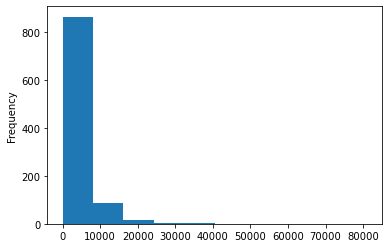

In [10]:
data["ApplicantIncome"].plot(kind = 'hist')

<AxesSubplot:>

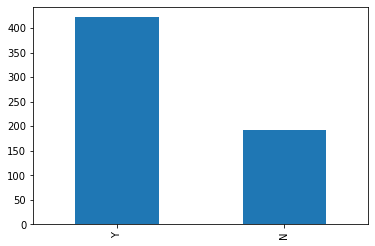

In [11]:
data["Loan_Status"].value_counts().plot(kind = "bar")

<AxesSubplot:ylabel='Frequency'>

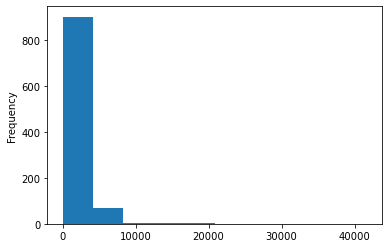

In [12]:
data["CoapplicantIncome"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

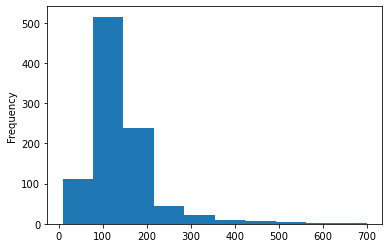

In [13]:
data["LoanAmount"].plot(kind = 'hist')

<AxesSubplot:>

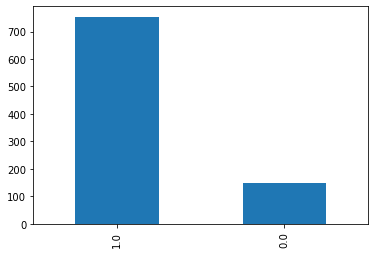

In [14]:
data["Credit_History"].value_counts().plot(kind = "bar")

In [15]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

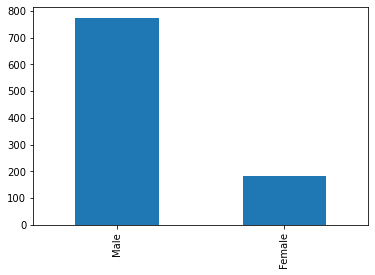

In [16]:
data['Gender'].value_counts().plot(kind = "bar")

<AxesSubplot:>

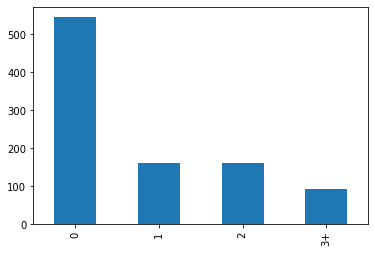

In [17]:
data['Dependents'].value_counts().plot(kind = "bar")

<AxesSubplot:>

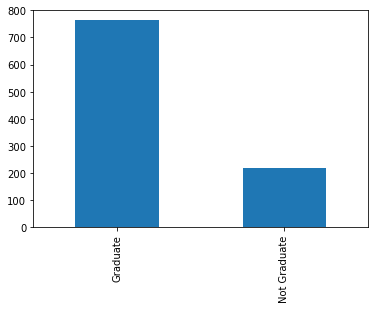

In [18]:
data['Education'].value_counts().plot(kind = "bar")

### Bivariate Analysis

In [19]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Married'>

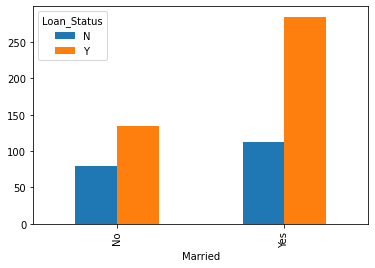

In [20]:
pd.crosstab(data["Married"],data['Loan_Status']).plot(kind = "bar")

In [22]:
#The Married people are rquesting for more loan

In [23]:
married = pd.crosstab(data["Married"],data['Loan_Status'])

In [24]:
married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [25]:
married.sum(1)

Married
No     213
Yes    398
dtype: int64

In [26]:
married.div(married.sum(1),axis = 0)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


<AxesSubplot:xlabel='Married'>

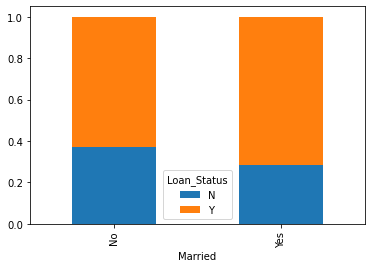

In [27]:
married.div(married.sum(1),axis = 0).plot(kind = "bar", stacked = "True")

In [28]:
def plotbivariate_percentage(x, y):
    cross = pd.crosstab(data[x],data[y])
    cross.div(cross.sum(1),axis = 0).plot(kind = "bar", stacked = "True")
    

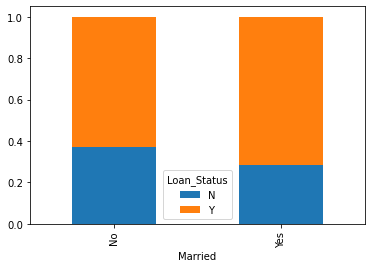

In [29]:
plotbivariate_percentage("Married", "Loan_Status")

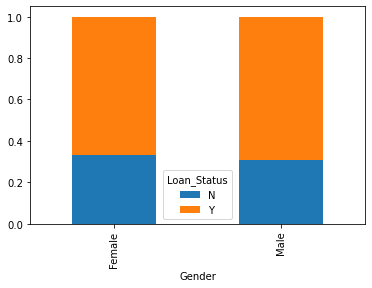

In [30]:
plotbivariate_percentage("Gender", "Loan_Status")

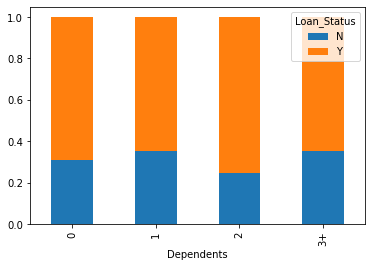

In [31]:
plotbivariate_percentage("Dependents", "Loan_Status")

In [32]:
Dependents = 2 have higher probablity


SyntaxError: invalid syntax (<ipython-input-32-4e511a5ca084>, line 1)

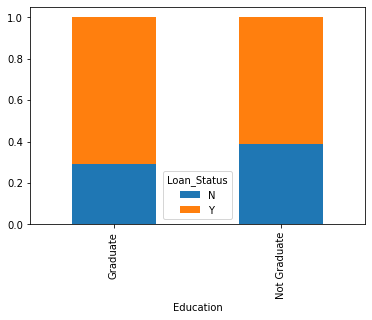

In [33]:
plotbivariate_percentage("Education", "Loan_Status")
#Graduates seems to have higher probablity of getting loan

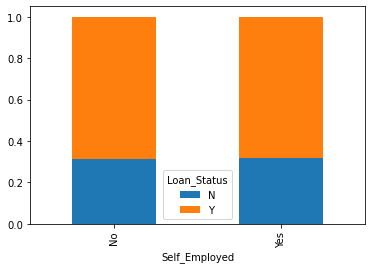

In [34]:
plotbivariate_percentage("Self_Employed", "Loan_Status")

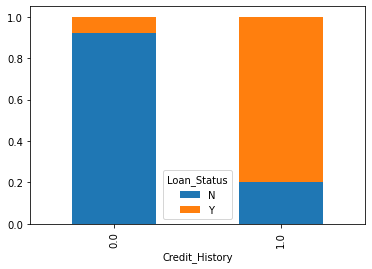

In [35]:
plotbivariate_percentage("Credit_History", "Loan_Status")
# If guidelines is followed higher probablity for loan approval

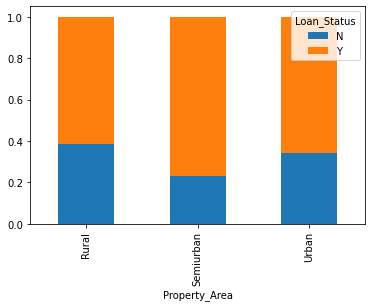

In [36]:
plotbivariate_percentage("Property_Area", "Loan_Status")


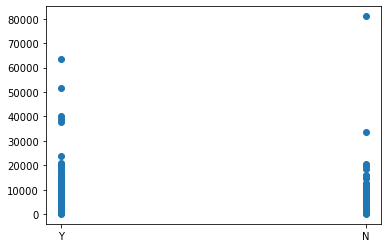

In [37]:
plt.scatter( train["Loan_Status"], train['ApplicantIncome'])

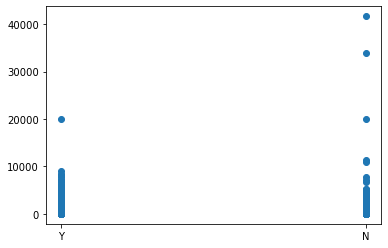

In [38]:
plt.scatter( train["Loan_Status"], train['CoapplicantIncome'])

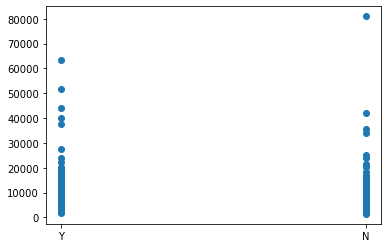

In [39]:
plt.scatter( train["Loan_Status"], train['CoapplicantIncome']+train['ApplicantIncome'])

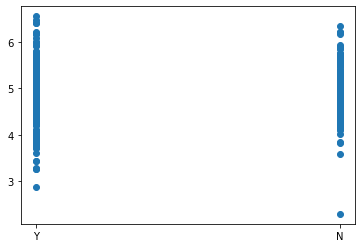

In [40]:

plt.scatter( train["Loan_Status"], np.log1p(train['LoanAmount']))


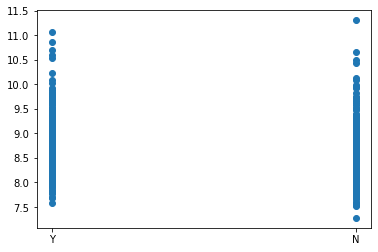

In [41]:
plt.scatter( train["Loan_Status"], np.log1p(train['CoapplicantIncome']+train['ApplicantIncome']))

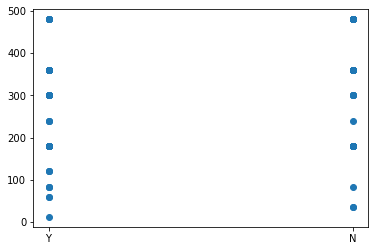

In [42]:

plt.scatter( train["Loan_Status"], train['Loan_Amount_Term'])

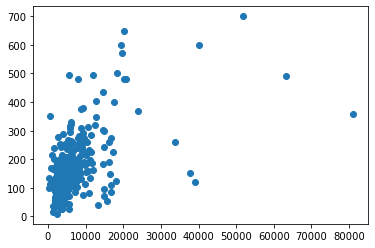

In [43]:
plt.scatter( train["ApplicantIncome"], train['LoanAmount'])

In [44]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000


In [45]:
data["Loan_Status"].replace({"Y":1, "N":0}, inplace=True)

<AxesSubplot:>

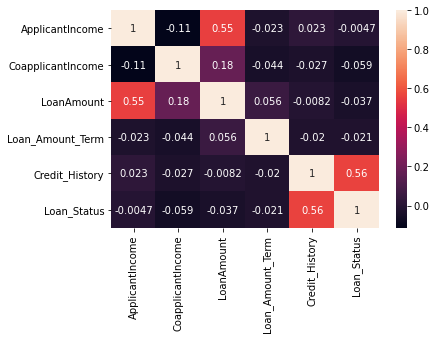

In [46]:
sbn.heatmap(data.corr(),annot=True)

In [178]:
data["ApplicantIncome_log"] = np.log1p(data["ApplicantIncome"])
data["CoapplicantIncome_log"] = np.log1p(data["CoapplicantIncome"])
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])


In [58]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378,-0.004710,0.693570,-0.250630,0.422423
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253,-0.059187,-0.276110,0.599156,0.194722
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235,-0.037318,0.460509,0.058408,0.903960
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439,-0.021268,-0.015435,0.002755,0.107150
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000,0.561678,0.080334,-0.024798,-0.034866
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,0.010959,0.060593,-0.039386
ApplicantIncome_log,0.693570,-0.276110,0.460509,-0.015435,0.080334,0.010959,1.000000,-0.342346,0.401669
CoapplicantIncome_log,-0.250630,0.599156,0.058408,0.002755,-0.024798,0.060593,-0.342346,1.000000,0.136063
LoanAmount_log,0.422423,0.194722,0.903960,0.107150,-0.034866,-0.039386,0.401669,0.136063,1.000000


<AxesSubplot:>

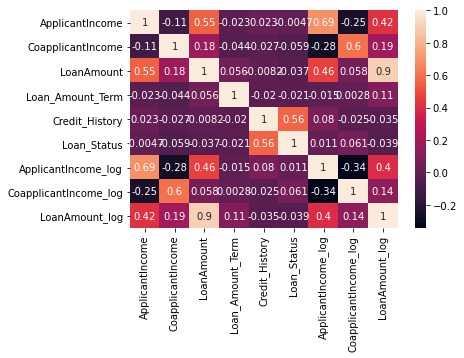

In [59]:
sbn.heatmap(data.corr(),annot=True)

# Data Preprocessing

In [60]:
data.isna().sum()

Loan_ID                    0
Gender                    24
Married                    3
Dependents                25
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                27
Loan_Amount_Term          20
Credit_History            79
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log            27
dtype: int64

In [64]:
data["Gender"].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [66]:
test["Gender"].isna().sum()

11

In [67]:
train["Gender"].isna().sum()

13

In [72]:
data["Gender"].fillna("unknown",inplace=True)

In [73]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    3
Dependents                25
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                27
Loan_Amount_Term          20
Credit_History            79
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log            27
dtype: int64

In [75]:
data[data["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1.0,8.247220,6.626718,5.081404
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1.0,8.467793,0.000000,5.068904
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1.0,9.215129,0.000000,NaN


In [77]:
data.dropna(subset=["Married"],inplace = True)

In [79]:
data.reset_index().drop(columns="index")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0,8.674197,0.000000,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0,7.857094,7.765993,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0,8.699681,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,8.296547,7.483244,4.736198
974,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,8.333030,6.565265,4.753590
975,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,8.086718,7.597898,4.844187
976,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,8.517393,7.780721,5.068904


In [80]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                22
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                26
Loan_Amount_Term          20
Credit_History            79
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log            26
dtype: int64

In [85]:
data[data["Dependents"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1.0,9.521568,0.000000,NaN
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1.0,8.642592,7.889084,5.198497
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0.0,8.462948,0.000000,4.934474
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0.0,8.597482,0.000000,4.969813
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1.0,7.964156,7.467942,4.663439
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1.0,7.949444,0.000000,4.276666
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1.0,8.613230,8.409831,4.262680
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0.0,8.167352,8.080547,5.030438
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1.0,8.246434,0.000000,4.762174
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,0.0,8.031060,7.496097,4.820282


In [84]:
data[data["Dependents"].isna()].Loan_Status.value_counts()

0.0    6
1.0    6
Name: Loan_Status, dtype: int64

In [83]:
data["Dependents"].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [87]:
data["Dependents"].replace({'3+':3}, inplace = True)

In [88]:
data["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
362    3
363    0
364    0
365    0
366    0
Name: Dependents, Length: 978, dtype: object

In [95]:
data['Dependents'] = data['Dependents'].astype('float')

In [100]:
import scipy

In [103]:
scipy.stats.mode

<function scipy.stats.stats.mode(a, axis=0, nan_policy='propagate')>

In [107]:
data.pivot_table(values="Dependents", index = "Married", columns = "Gender",aggfunc = scipy.stats.mode)

Gender,Female,Male,unknown
Married,,,
No,"([0.0], [90])","([0.0], [178])","([0.0], [8])"
Yes,"([0.0], [33])","([0.0], [230])","([0.0], [6])"


In [108]:
data["Dependents"].value_counts()

0.0    545
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

In [110]:
data.groupby("Married").Dependents.value_counts()

Married  Dependents
No       0.0           276
         1.0            36
         2.0            14
         3.0            12
Yes      0.0           269
         2.0           146
         1.0           124
         3.0            79
Name: Dependents, dtype: int64

In [111]:
data.pivot_table(values="Dependents", index = "Education", columns = "Gender",aggfunc = scipy.stats.mode)

Gender,Female,Male,unknown
Education,,,
Graduate,"([0.0], [101])","([0.0], [321])","([0.0], [13])"
Not Graduate,"([0.0], [22])","([0.0], [87])","([1.0], [2])"


In [112]:
data[data["Dependents"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1.0,9.521568,0.000000,NaN
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1.0,8.642592,7.889084,5.198497
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0.0,8.462948,0.000000,4.934474
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0.0,8.597482,0.000000,4.969813
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1.0,7.964156,7.467942,4.663439
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1.0,7.949444,0.000000,4.276666
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1.0,8.613230,8.409831,4.262680
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0.0,8.167352,8.080547,5.030438
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1.0,8.246434,0.000000,4.762174
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,0.0,8.031060,7.496097,4.820282


In [114]:
data["Dependents"].fillna(0, inplace = True)

In [115]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                26
Loan_Amount_Term          20
Credit_History            79
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log            26
dtype: int64

In [116]:
data["Self_Employed"]

0       No
1       No
2      Yes
3       No
4       No
      ... 
362    Yes
363     No
364     No
365     No
366    Yes
Name: Self_Employed, Length: 978, dtype: object

In [117]:
data.groupby("Self_Employed").ApplicantIncome.mean()

Self_Employed
No     4887.124378
Yes    6912.579832
Name: ApplicantIncome, dtype: float64

In [118]:
def sel_employed_imputation(x):
    if x>5000:
        return "Yes"
    else:
        return "No"

In [137]:
data_copy = data.copy()

In [138]:
res = data_copy[data_copy["Self_Employed"].isna()]["ApplicantIncome"].apply(lambda x:sel_employed_imputation(x) )

In [140]:
data_copy[data_copy["Self_Employed"].isna()].loc[:,'Self_Employed'] = res

In [136]:
data[data["Self_Employed"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
11,LP001027,Male,Yes,2.0,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,1.0,7.824446,7.518064,4.700480
19,LP001041,Male,Yes,0.0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1.0,7.863651,8.160804,4.753590
24,LP001052,Male,Yes,1.0,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0.0,8.220941,7.981392,5.023881
29,LP001087,Female,No,2.0,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,1.0,8.229778,7.642044,4.795791
30,LP001091,Male,Yes,1.0,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0.0,8.334952,8.122668,5.308268
95,LP001326,Male,No,0.0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,0.0,8.822175,0.000000,NaN
107,LP001370,Male,No,0.0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,0.0,8.900276,0.000000,4.795791
111,LP001387,Female,Yes,0.0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,1.0,7.982758,7.755339,4.941642
114,LP001398,Male,No,0.0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,1.0,8.527342,0.000000,4.779123
158,LP001546,Male,No,0.0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,1.0,8.000014,7.642044,4.795791


In [158]:
data[data["LoanAmount"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0,8.674197,0.000000,NaN
35,LP001106,Male,Yes,0.0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,1.0,7.730175,7.634337,NaN
63,LP001213,Male,Yes,1.0,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,0.0,8.506334,0.000000,NaN
81,LP001266,Male,Yes,1.0,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,1.0,7.781556,0.000000,NaN
95,LP001326,Male,No,0.0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,0.0,8.822175,0.000000,NaN
102,LP001350,Male,Yes,0.0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1.0,9.521568,0.000000,NaN
103,LP001356,Male,Yes,0.0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,1.0,8.445267,8.184235,NaN
113,LP001392,Female,No,1.0,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,1.0,8.916238,0.000000,NaN
127,LP001449,Male,No,0.0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,1.0,8.259976,7.403061,NaN
202,LP001682,Male,Yes,3.0,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,0.0,8.292298,0.000000,NaN


In [164]:
data["LoanAmount"] = data.groupby("Property_Area").LoanAmount.transform(lambda x: x.fillna(x.median()))

In [165]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term          20
Credit_History            79
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log            26
dtype: int64

In [166]:
data[data["Loan_Amount_Term"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
19,LP001041,Male,Yes,0.0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1.0,7.863651,8.160804,4.753590
36,LP001109,Male,Yes,0.0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,0.0,7.511525,7.193686,4.615121
44,LP001136,Male,Yes,0.0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1.0,8.454466,0.000000,4.574711
45,LP001137,Female,No,0.0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,1.0,8.134761,0.000000,4.488636
73,LP001250,Male,Yes,3.0,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,0.0,8.467162,0.000000,4.564348
112,LP001391,Male,Yes,0.0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,0.0,8.181161,8.322394,5.030438
165,LP001574,Male,Yes,0.0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,1.0,8.218248,8.060540,5.209486
197,LP001669,Female,No,0.0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,1.0,7.553811,7.768956,4.795791
223,LP001749,Male,Yes,0.0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,1.0,8.933137,6.918695,5.170484
232,LP001770,Male,No,0.0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,1.0,8.067776,7.862882,4.795791


In [170]:
data["Loan_Amount_Term"] = data.groupby("LoanAmount").Loan_Amount_Term.transform(lambda x: x.fillna(x.mean()))

In [171]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History            79
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log            26
dtype: int64

In [172]:
data[data["Credit_History"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
16,LP001034,Male,No,1.0,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,1.0,8.187855,0.000000,4.615121
24,LP001052,Male,Yes,1.0,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0.0,8.220941,7.981392,5.023881
30,LP001091,Male,Yes,1.0,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0.0,8.334952,8.122668,5.308268
42,LP001123,Male,Yes,0.0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,1.0,7.783641,0.000000,4.330733
79,LP001264,Male,Yes,3.0,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,1.0,8.111928,7.681099,4.875197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0.0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban,NaN,8.011687,7.601402,4.983607
351,LP002901,Male,No,0.0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural,NaN,7.733684,9.615872,4.672829
358,LP002954,Male,Yes,2.0,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,NaN,8.049746,0.000000,4.343805
360,LP002965,Female,Yes,0.0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban,NaN,9.053804,8.356085,4.574711


In [173]:
data[data["Credit_History"].isna()].Loan_Status.value_counts()

1.0    37
0.0    13
Name: Loan_Status, dtype: int64

In [174]:
data["Credit_History"].mode()

0    1.0
dtype: float64

In [176]:
data["Credit_History"].fillna(1, inplace = True)

In [177]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log            26
dtype: int64

In [179]:
data["ApplicantIncome_log"] = np.log1p(data["ApplicantIncome"])
data["CoapplicantIncome_log"] = np.log1p(data["CoapplicantIncome"])
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])


In [180]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed             55
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log             0
dtype: int64

In [181]:
def sel_employed_imputation(x):
    if x["ApplicantIncome"]>5000:
        return "Yes"
    else:
        return "No"

In [184]:
data["Self_employed_imputed"] = data.apply(lambda x: sel_employed_imputation(x), axis =1)

In [189]:
def sel_employed_imputation_impute(x):
    if x["Self_Employed"] is np.nan:
        return x["Self_employed_imputed"]
    else:
        return x["Self_Employed"]

In [191]:
data["Self_Employed"] = data.apply(lambda x: sel_employed_imputation_impute(x), axis =1)

In [192]:
#data["Self_Employed"].fillna(data["Self_employed_imputed"])

0       No
1       No
2      Yes
3       No
4       No
      ... 
362    Yes
363     No
364     No
365     No
366    Yes
Name: Self_Employed, Length: 978, dtype: object

In [194]:
data.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoapplicantIncome_log      0
LoanAmount_log             0
Self_employed_imputed      0
dtype: int64

In [261]:
data_preprocessed = data.drop(columns=["ApplicantIncome","CoapplicantIncome","LoanAmount","Self_employed_imputed"])

In [262]:
data_preprocessed

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0.0,Graduate,No,360.0,1.0,Urban,1.0,8.674197,0.000000,4.795791
1,LP001003,Male,Yes,1.0,Graduate,No,360.0,1.0,Rural,0.0,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0.0,Graduate,Yes,360.0,1.0,Urban,1.0,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0.0,Not Graduate,No,360.0,1.0,Urban,1.0,7.857094,7.765993,4.795791
4,LP001008,Male,No,0.0,Graduate,No,360.0,1.0,Urban,1.0,8.699681,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,360.0,1.0,Urban,NaN,8.296547,7.483244,4.736198
363,LP002975,Male,Yes,0.0,Graduate,No,360.0,1.0,Urban,NaN,8.333030,6.565265,4.753590
364,LP002980,Male,No,0.0,Graduate,No,360.0,1.0,Semiurban,NaN,8.086718,7.597898,4.844187
365,LP002986,Male,Yes,0.0,Graduate,No,360.0,1.0,Rural,NaN,8.517393,7.780721,5.068904


In [263]:
data_preprocessed.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'ApplicantIncome_log', 'CoapplicantIncome_log',
       'LoanAmount_log'],
      dtype='object')

In [264]:
data_preprocessed.shape

(978, 13)

In [265]:
cat_col = data_preprocessed.select_dtypes(exclude=np.number).drop(columns ='Loan_ID' ).columns

In [266]:
cat_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [267]:
cat_col_tranform = pd.get_dummies(data_preprocessed[cat_col])

In [268]:
num_col = data_preprocessed.select_dtypes(include=np.number).columns

In [269]:
data_preprocessed_cat_num = pd.concat([data_preprocessed['Loan_ID'],cat_col_tranform, data_preprocessed[num_col]], axis = 1)

In [270]:
data_preprocessed_cat_num.dropna(subset=["Loan_Status"]).shape

(611, 20)

In [271]:
data_preprocessed_cat_num[data_preprocessed_cat_num["Loan_Status"].isna()].shape

(367, 20)

In [272]:
data_preprocessed_cat_num.dropna(subset=["Loan_Status"]).shape

(611, 20)

In [273]:
train_preprocessd = data_preprocessed_cat_num.dropna(subset=["Loan_Status"])

In [274]:
test_preprocessd = data_preprocessed_cat_num[data_preprocessed_cat_num["Loan_Status"].isna()]

In [275]:
test_preprocessd = test_preprocessd.drop(columns="Loan_Status")

In [276]:
test_preprocessd

,Loan_ID,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,Loan_Amount_Term,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001015,0,1,0,0,1,1,0,1,0,0,0,1,0.0,360.0,1.0,8.651899,0.000000,4.709530
1,LP001022,0,1,0,0,1,1,0,1,0,0,0,1,1.0,360.0,1.0,8.031710,7.313887,4.844187
2,LP001031,0,1,0,0,1,1,0,1,0,0,0,1,2.0,360.0,1.0,8.517393,7.496097,5.342334
3,LP001035,0,1,0,0,1,1,0,1,0,0,0,1,2.0,360.0,1.0,7.758333,7.842671,4.615121
4,LP001051,0,1,0,1,0,0,1,1,0,0,0,1,0.0,360.0,1.0,8.094684,0.000000,4.369448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,0,0,1,0,1,0,1,0,0,1,3.0,360.0,1.0,8.296547,7.483244,4.736198
363,LP002975,0,1,0,0,1,1,0,1,0,0,0,1,0.0,360.0,1.0,8.333030,6.565265,4.753590
364,LP002980,0,1,0,1,0,1,0,1,0,0,1,0,0.0,360.0,1.0,8.086718,7.597898,4.844187
365,LP002986,0,1,0,0,1,1,0,1,0,1,0,0,0.0,360.0,1.0,8.517393,7.780721,5.068904


In [277]:
train_preprocessd.to_csv("train_preprocessed.csv", index = False)

In [278]:
test_preprocessd.to_csv("test_preprocessd.csv", index = False)

In [279]:
test_preprocessd.shape

(367, 19)

In [280]:
train_preprocessd.shape

(611, 20)